In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

# Data Exploration

In this notebook, we will explore the data after the first data cleaning but before any data preprocessing has been done.

The objective of this part, is to gain insight for the client in the business part considering the columns that will not be used for the model as well as for the model training or a possible extension of the model in the future.

There is a conclusion by subtopic and an overall conclusion at the end of the notebook.

In [2]:
cleaned_data = pd.read_csv('../data/cleaned_data.csv')

In [3]:
cleaned_data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score
count,393606.000000,393606.000000,393606.000000,393606.000000
mean,282537.185536,1.732883,2.203262,4.179187
std,165111.507291,6.869854,7.533126,1.312038
min,1.000000,0.000000,0.000000,1.000000
25%,138651.250000,0.000000,0.000000,4.000000
50%,279657.500000,0.000000,1.000000,5.000000
75%,428215.750000,2.000000,2.000000,5.000000
max,568454.000000,866.000000,923.000000,5.000000


## Score

Mean Score : 4.18

In [4]:
cleaned_data.Score.value_counts()

Score
5    250726
4     56043
1     36282
3     29759
2     20796
Name: count, dtype: int64

Score conclusions:

- The score classes are imbalanced, 5 stars
reviews are the majority, followed by 4 stars ones
- We notice that the mean score is around 4.18
- We notice that before the year 2006 the number of reviews per year was quite low (slightly more than 1000 in 2005)
- The reviews number grows steadily over time and in the last 2 years, from 2010 to 2012, the number passed from around 58000 to 139000 reviews
- Overall, we can state that the customers are reviewing much more over the years and they are very satisfied with the products, since positive scores are the most

C:\Users\a.ramirez.lopez\AppData\Local\Temp\ipykernel_16532\961387213.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=score_counts.index, y=score_counts.values, palette=colors)


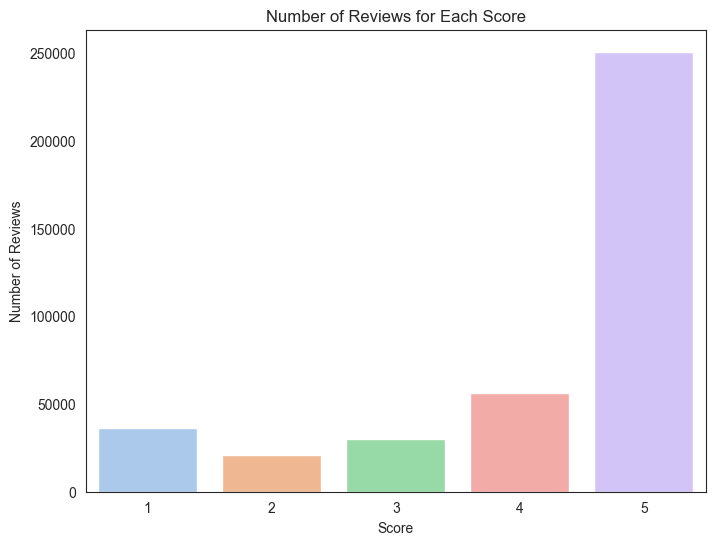

In [5]:
score_counts = cleaned_data['Score'].value_counts().sort_index()

sns.set_style("white")

# Define a color palette for the bars
colors = sns.color_palette('pastel', len(score_counts))

# Plot the number of reviews for each score
plt.figure(figsize=(8, 6))
sns.barplot(x=score_counts.index, y=score_counts.values, palette=colors)

# Add labels and title
plt.xlabel('Score')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews for Each Score')

# Show the plot
plt.show()

We notice that the dataset in imbalanced, the number of 5 stars reviews is much higher than the rest

## Helpfulness

The helpfulness is a feature that seems to be not correctly promoted in the platform. The results has been proved that there is a correlation in good reviews and the helpfulness metric. If promoted correctly, it could be used as an extra mismatched flag for the reviews. 

We have discovered that it also correlated to better review scores, that could be a trend that can be analyzed later. If people tend to feel more thankful to positive reviews than negative.

In [6]:
(cleaned_data['HelpfulnessDenominator'] == 0).sum() / cleaned_data.shape[0]

0.46879366676320994

Analyze the helpfulness, here we compute the ratio of numerator/denominator and get rid ov NaN values which are given by the cases in which the denominator is zero (whene the reviews haven't been voted)

In [7]:
cleaned_data_h = cleaned_data.copy()

In [8]:
cleaned_data_h['HelpfulnessRatio'] = cleaned_data_h['HelpfulnessNumerator'] / cleaned_data_h['HelpfulnessDenominator']
cleaned_data_h.dropna(subset=['HelpfulnessRatio'], inplace=True)


### Now we classify the helfulness into three classes: Very Helpful, Mid Helpful and Not Helpful

In [9]:
def categorize_helpfulness(ratio):
    if ratio >= 0.75:
        return 'Very Helpful'
    elif 0.25 <= ratio < 0.75:
        return 'Mid Helpful'
    else:
        return 'Not Helpful'

cleaned_data_h['HelpfulnessCategory'] = cleaned_data_h['HelpfulnessRatio'].apply(categorize_helpfulness)


In [10]:
cleaned_data_h.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,HelpfulnessRatio
count,209086.000000,209086.000000,209086.000000,209086.000000,209086.000000
mean,282353.732072,3.262165,4.147657,4.001985,0.786290
std,164394.179752,9.157301,9.938009,1.448322,0.341312
min,1.000000,0.000000,1.000000,1.000000,0.000000
25%,138781.250000,1.000000,1.000000,3.000000,0.666667
50%,279957.500000,2.000000,2.000000,5.000000,1.000000
75%,427528.500000,3.000000,4.000000,5.000000,1.000000
max,568453.000000,866.000000,923.000000,5.000000,3.000000


Mean Helpfulness : 78.6%

### We visualize how the helpfulness of the reviews is distributed, most reviews are considered to be very helpful

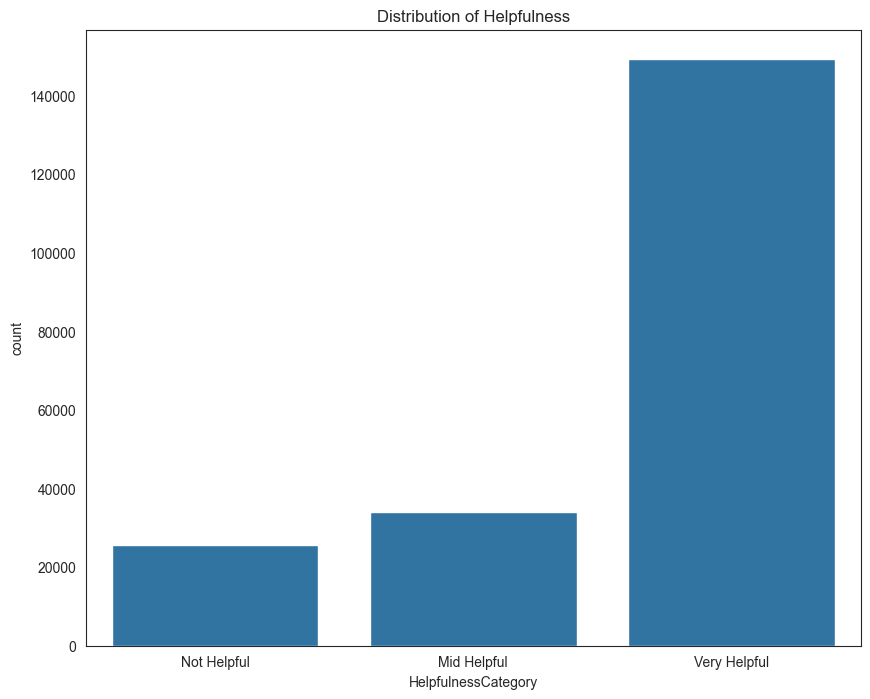

In [11]:
plt.figure(figsize=(10,8))
sns.countplot(x='HelpfulnessCategory',data=cleaned_data_h,order=['Not Helpful','Mid Helpful','Very Helpful'])
plt.title('Distribution of Helpfulness')
plt.show()

Conclusions:

- The majority of reviews which are considered helpful by the  community have positive 
scores
- The combination of 5-star ratings and high helpfulness ratios suggests high satisfaction with the products


## Users

### Pattern/trend related to most prolific reviewers
we plot the helpfulness ratio and mean score and notice that top reviewers levae on average very good and helfpul reviews -> we should incentivize people to review and say if the review has been helpful more

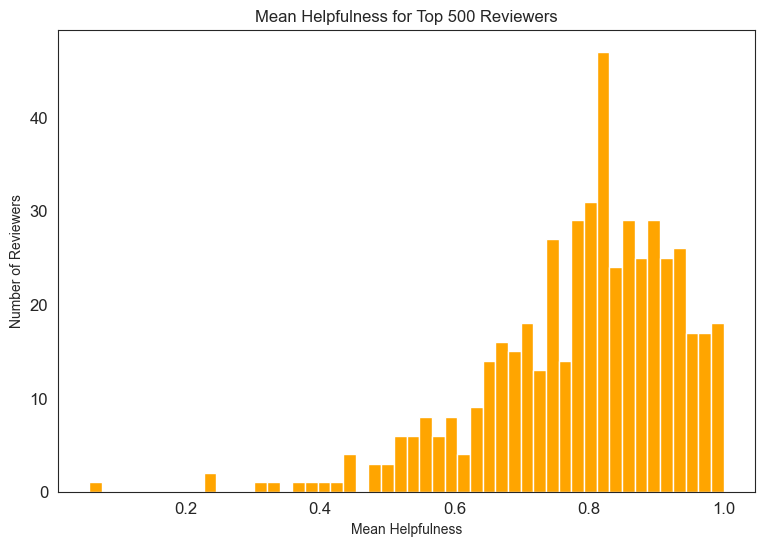

In [12]:

top_500_reviewers = cleaned_data_h['UserId'].value_counts().head(500).index.tolist()
top_500_reviews = cleaned_data_h[cleaned_data_h['UserId'].isin(top_500_reviewers)]
mean_helpfulness_per_reviewer = top_500_reviews.groupby('UserId')['HelpfulnessRatio'].mean()

# Plotting
plt.figure(figsize=(9, 6))
plt.hist(mean_helpfulness_per_reviewer, bins=50, color='orange')
plt.xlabel('Mean Helpfulness')
plt.ylabel('Number of Reviewers')
plt.title('Mean Helpfulness for Top 500 Reviewers')

plt.xticks(fontsize=12)  # Set font size for x-axis tick labels
plt.yticks(fontsize=12)  # Set font size for y-axis tick labels
plt.grid(False)
plt.savefig('mean_helpfulness_histogram.png')

plt.show()

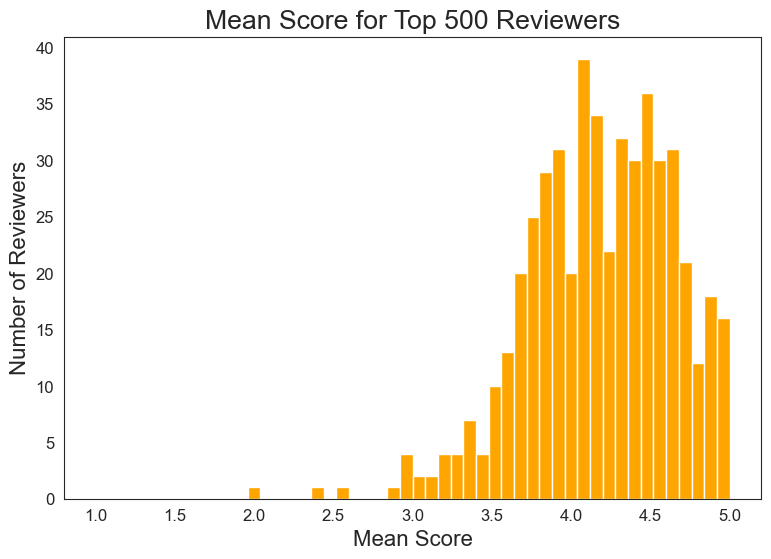

Number of reviewers with average score >= 4: 334


In [13]:
reviewer_review_counts = cleaned_data['UserId'].value_counts()
top_reviewers = reviewer_review_counts.head(500).index

# Filter the data for the top 500 reviewers
top_reviewer_data = cleaned_data[cleaned_data['UserId'].isin(top_reviewers)]

# Calculate the mean score for each of the top 500 reviewers
mean_score_per_reviewer = top_reviewer_data.groupby('UserId')['Score'].mean()
plt.rcParams.update({'font.size': 16})
# Plot a histogram of the mean scores
plt.figure(figsize=(9, 6))
plt.hist(mean_score_per_reviewer, bins=50, range=(1, 5), color='orange')  # Set x-axis range from 1 to 5
plt.xlabel('Mean Score')
plt.ylabel('Number of Reviewers')
plt.title('Mean Score for Top 500 Reviewers')
plt.grid(False)
plt.xticks(fontsize=12)  # Set font size for x-axis tick labels
plt.yticks(fontsize=12)
plt.savefig('mean_score_histogram.png')
plt.show()

# Count the number of reviewers with mean score >= 4
num_reviewers_high_score = (mean_score_per_reviewer >=4).sum()

print(f"Number of reviewers with average score >= 4: {num_reviewers_high_score}")

## Reviews

### Relationship between number of reviews and average score over all the dataset

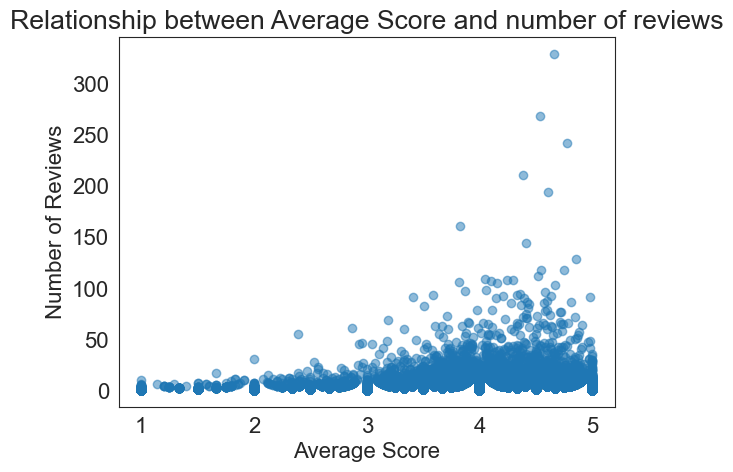

In [14]:
#count  number of reviews given by each user
user_review_counts = cleaned_data['UserId'].value_counts()

# Calculate average scores given by each user
user_average_scores = cleaned_data.groupby('UserId')['Score'].mean()

user_stats = pd.DataFrame({'ReviewCount': user_review_counts, 'AverageScore': user_average_scores})

# Plotting
plt.scatter(user_stats['AverageScore'], user_stats['ReviewCount'], alpha=0.5)
plt.xlabel('Average Score')
plt.ylabel('Number of Reviews')
plt.title('Relationship between Average Score and number of reviews')
plt.show()

Users with more reviews to higher ratings

Conclusions:

There is a meaningful increase of the number of reviews over the years and the 5-stars
reviews are the ones which have increased the most.

- From 2006 on, the average score has been quite constant, with an extremely slight
decrease in the last 2 years.
- Looking at the average score per month, we notice that there is not much variability, which
can be expected considering that the dataset is very imbalanced towards positive reviews.
However, it has been noticed that the lowest average scores are in the months of
December and February.
- The months of September and October have the highest number of reviews (still very close
to the other months), suggesting that they are also probably the months when the number
of buys is higher

### Visualize how the number of reviews grows over the years

The trend says that the number of 5 score reviews and positive reviews in general are growing exponentially respect to the others.

Conclusions:

- Big increase in number of reviews, the growth seems to have an exponential behavior for the 5-stars reviews.
- In the last 2 years the number of positive reviews doubled
- This trend suggests an increasing satisfaction of the customers

In [15]:
cleaned_data['Time'] = pd.to_datetime(cleaned_data['Time'])

# Extract 'Month' and 'Year' from the 'Time' column
cleaned_data['Month'] = cleaned_data['Time'].dt.month
cleaned_data['Year'] = cleaned_data['Time'].dt.year

In [16]:
cleaned_data.Year.value_counts()

Year
2012.0    138910
2011.0    113399
2010.0     57938
2009.0     37940
2008.0     23226
2007.0     15774
2006.0      4748
2005.0      1072
2004.0       427
2003.0       107
2002.0        37
2000.0        15
2001.0         8
1999.0         4
Name: count, dtype: int64

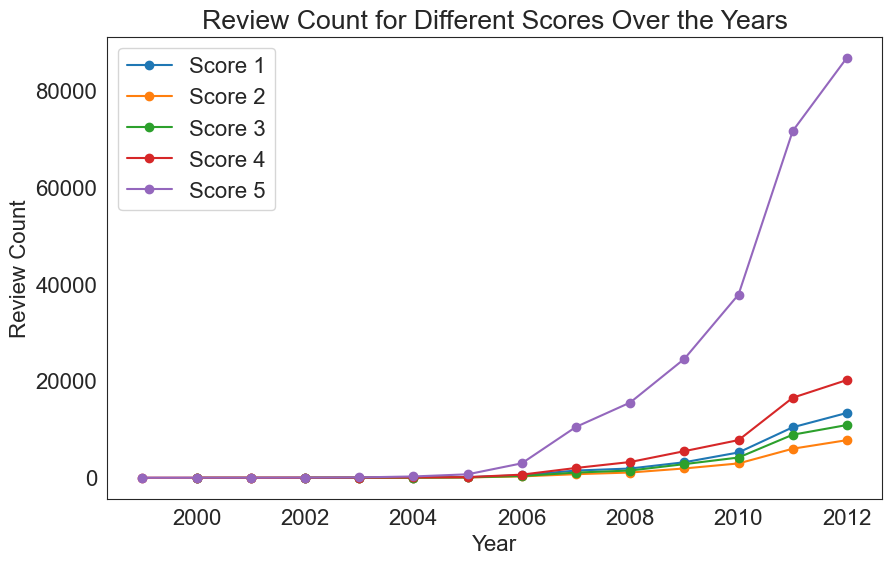

In [17]:
review_count_per_year_score = cleaned_data.groupby(['Year', 'Score'])['Text'].count().unstack()

# Plotting review count for different scores over the years
plt.figure(figsize=(10, 6))
for score in range(1, 6):
    plt.plot(review_count_per_year_score.index, review_count_per_year_score[score], marker='o', label=f'Score {score}')

plt.xlabel('Year')
plt.ylabel('Review Count')
plt.title('Review Count for Different Scores Over the Years')
plt.legend()

plt.show()

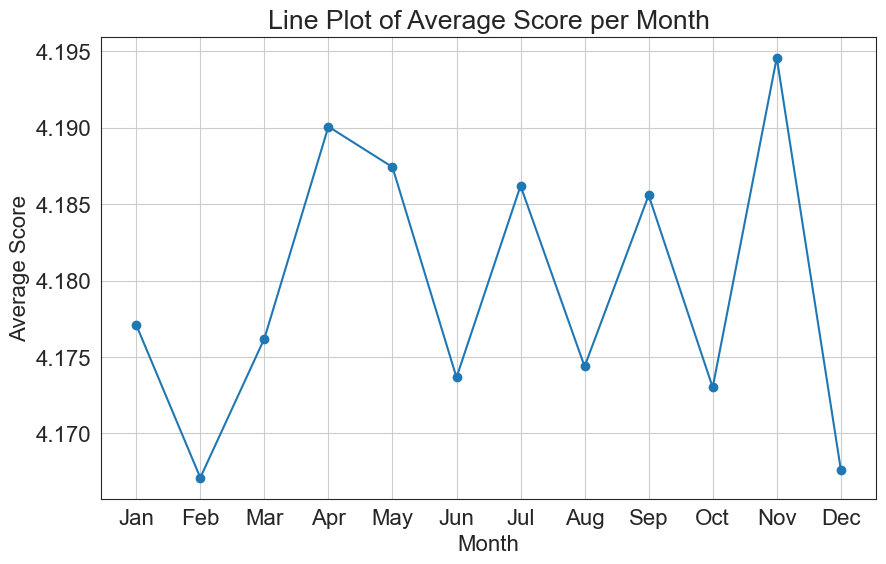

In [18]:
average_score_per_month = cleaned_data.groupby('Month')['Score'].mean()

# Plotting average score per month as a line plot
plt.figure(figsize=(10, 6))
plt.plot(average_score_per_month.index, average_score_per_month.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Average Score')
plt.title('Line Plot of Average Score per Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
  # Set y-axis range from 0 to 5 for average score
plt.show()

there is not much variability in the average score over the months

### The length of the reviews (original text) is on average a little less than 200 words, however longer reviews are often associated with positive scores

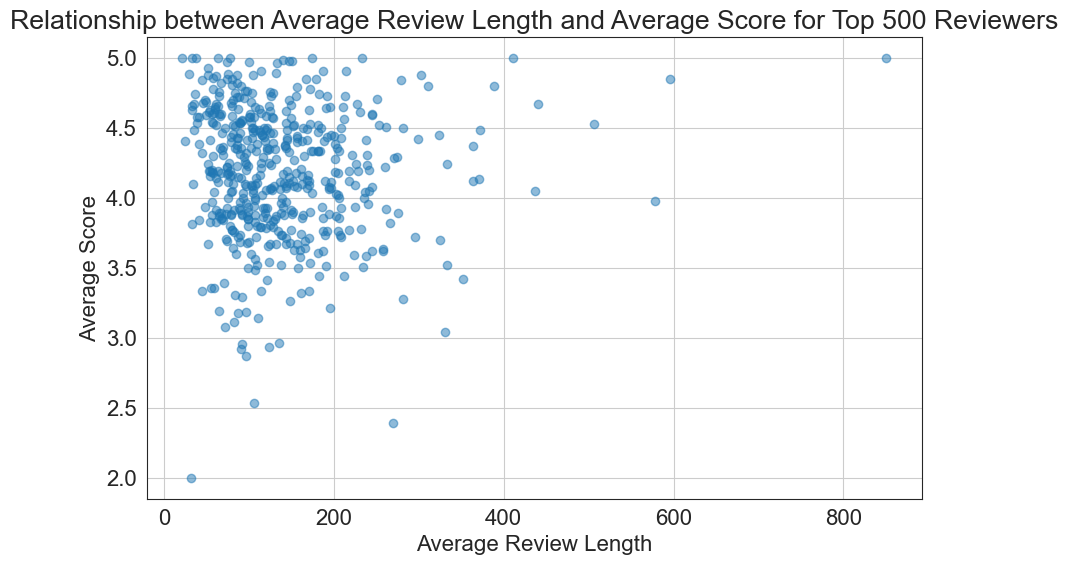

In [19]:
reviewer_review_counts = cleaned_data['UserId'].value_counts()

# Select the top 500 reviewers
top_reviewers = reviewer_review_counts.head(500).index

# Filter the data for the top 500 reviewers
top_reviewer_data = cleaned_data[cleaned_data['UserId'].isin(top_reviewers)]

# Calculate the average length of reviews for each reviewer
average_length_per_reviewer = top_reviewer_data.groupby('UserId')['Text'].apply(lambda x: x.str.split().apply(len).mean())

# Calculate the average score for each reviewer
average_score_per_reviewer = top_reviewer_data.groupby('UserId')['Score'].mean()

# Create a DataFrame with average length of reviews and average score for each reviewer
reviewer_stats = pd.DataFrame({
    'Average Review Length': average_length_per_reviewer,
    'Average Score': average_score_per_reviewer
})

# Plot a scatter plot of the relationship between average review length and average score for the top 500 reviewers
plt.figure(figsize=(10, 6))
plt.scatter(reviewer_stats['Average Review Length'], reviewer_stats['Average Score'], alpha=0.5)
plt.xlabel('Average Review Length')
plt.ylabel('Average Score')
plt.title('Relationship between Average Review Length and Average Score for Top 500 Reviewers')
plt.grid(True)
plt.show()

Reviewer conclusions:

- We look into possible trends and patterns related to the 500 most prolific reviewers, to see if it could be useful to encourage customers to write more reviews.
- We notice that these reviewers have an average very positive score. In fact, the 67% of these reviewers leave reviews which have on average a score of 4 or higher.
- We notice that the length of the reviews varies a little with the score: the 3 stars reviews are on average the longest ones, while the 5 stars ones the shortest
- The helpfulness ratio, which is the percentage of people who found that review useful, is on
average high. In fact, the majority of these reviewers (almost 70%) have a mean helpfulness of 75% or higher.

**Suggestion**: given these considerations, it might be a good idea to encourage more users to leave reviews, especially longer ones. Some sort of incentive/reward to the most prolific reviewers could be used

# Conclusions

- Helpfulness is a good starting point to ensure the quality of the reviews and we strongly recommend to be promoted.
- There is a pattern to the percentage of positive reviews increasing by time. If the patterns continue, probably it will be very important to avoid bad reviews at the first stage of the product.
- More reviews, usually has better score. Encouraging people to review more in other products can increase the overall score of the brand.
- From the model point of view, the imbalance labels can be a problem.